In [1]:
# ContinuousPeaks
import mlrose_hiive
import numpy as np 
import matplotlib.pyplot as plt
import time

In [2]:
%%time
time_dict = {}
best_fitness_dict = {}
size_range = range(10, 200, 10)
max_iters = 1000
for size in size_range:
    print("Problem size: ", size)
    fitness = mlrose_hiive.SixPeaks(t_pct = 0.15)
    problem = mlrose_hiive.DiscreteOpt(length = size, fitness_fn = fitness, maximize = True, max_val = 2)
    problem.set_mimic_fast_mode(True)
    init_state = np.random.randint(2, size = size)
    
    # RHC
    start = time.time()
    _, best_fitness_rhc, _ = mlrose_hiive.random_hill_climb(problem, 
                                                            max_attempts = 100, 
                                                            max_iters = max_iters, 
                                                            init_state = init_state, 
                                                            curve = True)
    end = time.time()
    rhc_time = end - start
    

    time_list = time_dict.get('RHC', [])
    time_list.append(rhc_time)
    time_dict['RHC'] = time_list
    
    fit_list = best_fitness_dict.get('RHC', [])
    fit_list.append(best_fitness_rhc)
    best_fitness_dict['RHC'] = fit_list
    
    
    # SA
    start = time.time()
    _, best_fitness_sa, _ = mlrose_hiive.simulated_annealing(problem, 
                                                             schedule = mlrose_hiive.ExpDecay(), 
                                                             max_attempts = 100, 
                                                             max_iters = max_iters, 
                                                             init_state = init_state, 
                                                             curve = True)
    

    end = time.time()
    sa_time = end - start
    
   
    time_list = time_dict.get('SA', [])
    time_list.append(sa_time)
    time_dict['SA'] = time_list
    
    fit_list = best_fitness_dict.get('SA', [])
    fit_list.append(best_fitness_sa)
    best_fitness_dict['SA'] = fit_list

    
    # GA
    start = time.time()
    _, best_fitness_ga, _ = mlrose_hiive.genetic_alg(problem, 
                                                     max_attempts = 100, 
                                                     max_iters = max_iters, 
                                                     curve = True)
    end = time.time()
    ga_time = end - start
    

    time_list = time_dict.get('GA', [])
    time_list.append(ga_time)
    time_dict['GA'] = time_list
    
    fit_list = best_fitness_dict.get('GA', [])
    fit_list.append(best_fitness_ga)
    best_fitness_dict['GA'] = fit_list
    
    
    # MIMIC
    start = time.time()
    _, best_fitness_mimic, _ = mlrose_hiive.mimic(problem, 
                                                  pop_size = 500, 
                                                  max_attempts = 100, 
                                                  max_iters = max_iters, 
                                                  curve = True)
    end = time.time()
    mimic_time = end - start
    
    time_list = time_dict.get('MIMIC', [])
    time_list.append(mimic_time)
    time_dict['MIMIC'] = time_list
    
    fit_list = best_fitness_dict.get('MIMIC', [])
    fit_list.append(best_fitness_mimic)
    best_fitness_dict['MIMIC'] = fit_list

Problem size:  10
Problem size:  20
Problem size:  30
Problem size:  40
Problem size:  50
Problem size:  60
Problem size:  70
Problem size:  80
Problem size:  90
Problem size:  100
Problem size:  110
Problem size:  120
Problem size:  130
Problem size:  140
Problem size:  150
Problem size:  160
Problem size:  170
Problem size:  180
Problem size:  190
CPU times: user 5min 40s, sys: 7.19 s, total: 5min 47s
Wall time: 5min 48s


In [6]:
import pickle
# Store data (serialize)
with open('fpp_best_fitness_dict.pickle', 'wb') as fitness:
    pickle.dump(best_fitness_dict, fitness, protocol=pickle.HIGHEST_PROTOCOL)
with open('fpp_time_dict.pickle', 'wb') as fitness:
    pickle.dump(time_dict, fitness, protocol=pickle.HIGHEST_PROTOCOL)

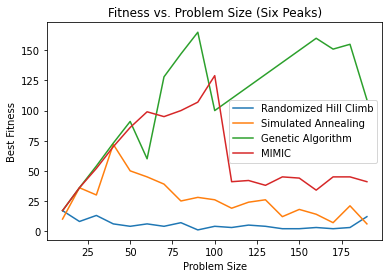

In [3]:
plt.plot(size_range, best_fitness_dict['RHC'], label = 'Randomized Hill Climb')
plt.plot(size_range, best_fitness_dict['SA'], label = 'Simulated Annealing')
plt.plot(size_range, best_fitness_dict['GA'], label = 'Genetic Algorithm')
plt.plot(size_range, best_fitness_dict['MIMIC'], label = 'MIMIC')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Best Fitness')
plt.title('Fitness vs. Problem Size (Six Peaks)')
plt.show()

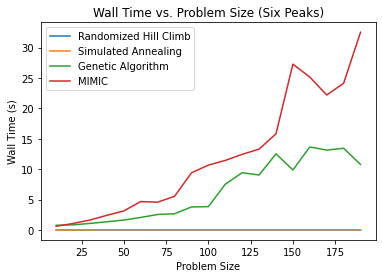

In [4]:
plt.figure()
plt.plot(size_range, time_dict['RHC'], label = 'Randomized Hill Climb')
plt.plot(size_range, time_dict['SA'], label = 'Simulated Annealing')
plt.plot(size_range, time_dict['GA'], label = 'Genetic Algorithm')
plt.plot(size_range, time_dict['MIMIC'], label = 'MIMIC')
plt.title('Wall Time vs. Problem Size (Six Peaks)')
plt.legend()
plt.xlabel('Problem Size')
plt.ylabel('Wall Time (s)')
plt.savefig('flip_flop_time.png')

In [10]:
# iteration plot using using the best problem size for each algorithm

problem_size = 200

fitness = mlrose_hiive.SixPeaks()
problem.set_mimic_fast_mode(True)

start = time.time()
problem = mlrose_hiive.DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
init_state = np.random.randint(2, size = problem_size)
_, _, fitness_curve_rhc = mlrose_hiive.random_hill_climb(problem, max_attempts = 10, max_iters = 1000, init_state = init_state, curve = True)
end = time.time()
print('RHC: ', end-start, 's')
print("Done with RHC iterations!")

start = time.time()
problem = mlrose_hiive.DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
init_state = np.random.randint(2, size = problem_size)
_, _, fitness_curve_sa = mlrose_hiive.simulated_annealing(problem, schedule = mlrose_hiive.ExpDecay(), max_attempts = 10, max_iters=1000,init_state = init_state, curve = True)
end = time.time()
print('SA: ', end-start, 's')
print("Done with SA iterations!")

start = time.time()
problem = mlrose_hiive.DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
init_state = np.random.randint(2, size = problem_size)
_, _, fitness_curve_ga = mlrose_hiive.genetic_alg(problem, max_attempts = 10, max_iters=1000,curve = True)
end = time.time()
print('GA: ', end-start, 's')
print("Done with GA iterations!")

start = time.time()
problem = mlrose_hiive.DiscreteOpt(length = problem_size, fitness_fn = fitness, maximize = True, max_val = 2)
init_state = np.random.randint(2, size = problem_size)
_, _, fitness_curve_mimic = mlrose_hiive.mimic(problem, pop_size = 200, max_attempts = 10, max_iters=1000,curve = True)
end = time.time()
print('MIMIC: ', end-start, 's')
print("Done with MIMIC iterations!")

RHC:  0.0011832714080810547 s
Done with RHC iterations!
SA:  0.03392505645751953 s
Done with SA iterations!
GA:  0.44159483909606934 s
Done with GA iterations!
MIMIC:  329.4105920791626 s
Done with MIMIC iterations!


Text(0, 0.5, 'Fitness')

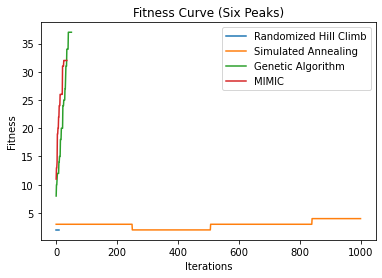

In [11]:
plt.figure()
plt.plot(fitness_curve_rhc[:,0], label = 'Randomized Hill Climb')
plt.plot(fitness_curve_sa[:,0], label = 'Simulated Annealing')
plt.plot(fitness_curve_ga[:,0], label = 'Genetic Algorithm')
plt.plot(fitness_curve_mimic[:,0], label = 'MIMIC')
plt.title('Fitness Curve (Six Peaks)')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Fitness')

Text(0.5, 1.0, 'Time Comparison (Six Peaks)')

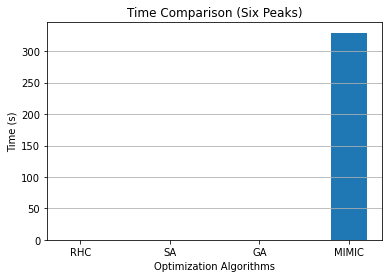

In [13]:
run_time = {}
run_time['RHC'] = 0.0012
run_time['SA'] = 0.0339
run_time['GA'] = 0.4416
run_time['MIMIC'] = 329.41

plt.bar(run_time.keys(), run_time.values(), width=0.4)
plt.grid(axis='y')
plt.ylabel('Time (s)')
plt.xlabel('Optimization Algorithms')
plt.title('Time Comparison (Six Peaks)')